#### Import Libraries | Set the Computation Device as GPU | Connect Google Drive to Load Data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.datasets import mnist
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

In [2]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#### Load MNIST, Noisy MNIST and Process the Data to Train Denoiser

##### Load MNIST

In [4]:
(x_train, y_mnist_train), (x_test, y_mnist_test) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [5]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [6]:
x_train = x_train.reshape(len(x_train), 28, 28, 1)
x_test = x_test.reshape(len(x_test), 28, 28, 1)
print(x_train.shape)

(60000, 28, 28, 1)


##### Dividing MNIST by Labels

In [7]:
x_train0 = x_train[y_mnist_train == 0]
x_train1 = x_train[y_mnist_train == 1]
x_train2 = x_train[y_mnist_train == 2]
x_train3 = x_train[y_mnist_train == 3]
x_train4 = x_train[y_mnist_train == 4]
x_train5 = x_train[y_mnist_train == 5]
x_train6 = x_train[y_mnist_train == 6]
x_train7 = x_train[y_mnist_train == 7]
x_train8 = x_train[y_mnist_train == 8]
x_train9 = x_train[y_mnist_train == 9]
print(f'{x_train0.shape}: X Train Label 0, {x_train1.shape}: X Train Label 1')
print(f'{x_train2.shape}: X Train Label 2, {x_train3.shape}: X Train Label 3')
print(f'{x_train4.shape}: X Train Label 4, {x_train5.shape}: X Train Label 5')
print(f'{x_train6.shape}: X Train Label 6, {x_train7.shape}: X Train Label 7')
print(f'{x_train8.shape}: X Train Label 8, {x_train9.shape}: X Train Label 9')

(5923, 28, 28, 1): X Train Label 0, (6742, 28, 28, 1): X Train Label 1
(5958, 28, 28, 1): X Train Label 2, (6131, 28, 28, 1): X Train Label 3
(5842, 28, 28, 1): X Train Label 4, (5421, 28, 28, 1): X Train Label 5
(5918, 28, 28, 1): X Train Label 6, (6265, 28, 28, 1): X Train Label 7
(5851, 28, 28, 1): X Train Label 8, (5949, 28, 28, 1): X Train Label 9


In [8]:
y_mnist_train0 = y_mnist_train[y_mnist_train == 0]
y_mnist_train1 = y_mnist_train[y_mnist_train == 1]
y_mnist_train2 = y_mnist_train[y_mnist_train == 2]
y_mnist_train3 = y_mnist_train[y_mnist_train == 3]
y_mnist_train4 = y_mnist_train[y_mnist_train == 4]
y_mnist_train5 = y_mnist_train[y_mnist_train == 5]
y_mnist_train6 = y_mnist_train[y_mnist_train == 6]
y_mnist_train7 = y_mnist_train[y_mnist_train == 7]
y_mnist_train8 = y_mnist_train[y_mnist_train == 8]
y_mnist_train9 = y_mnist_train[y_mnist_train == 9]
print(f'{y_mnist_train0.shape}: y Train Label 0, {y_mnist_train1.shape}: y Train Label 1')
print(f'{y_mnist_train2.shape}: y Train Label 2, {y_mnist_train3.shape}: y Train Label 3')
print(f'{y_mnist_train4.shape}: y Train Label 4, {y_mnist_train5.shape}: y Train Label 5')
print(f'{y_mnist_train6.shape}: y Train Label 6, {y_mnist_train7.shape}: y Train Label 7')
print(f'{y_mnist_train8.shape}: y Train Label 8, {y_mnist_train9.shape}: y Train Label 9')

(5923,): y Train Label 0, (6742,): y Train Label 1
(5958,): y Train Label 2, (6131,): y Train Label 3
(5842,): y Train Label 4, (5421,): y Train Label 5
(5918,): y Train Label 6, (6265,): y Train Label 7
(5851,): y Train Label 8, (5949,): y Train Label 9


##### Final MNIST Train Data

In [9]:
traindata = np.vstack((x_train0, x_train1[:6683], x_train2, x_train3, x_train4[:5818], x_train5[:5403], x_train6[:5894],
                       x_train7[:6252], x_train8[:5849], x_train9))

In [10]:
traindata_shuffled = shuffle(traindata, random_state=42)

In [11]:
print(traindata_shuffled.shape)

(59860, 28, 28, 1)


##### Load Noisy MNIST and Process the Data

In [12]:
import pickle

with open ('/content/drive/MyDrive/DL-Proj-Final/636_project1_train_images', 'rb') as trainfile:
  noisyimages = pickle.load(trainfile)

with open ('/content/drive/MyDrive/DL-Proj-Final/636_project1_train_labels', 'rb') as labelsfile:
  noisylabels = pickle.load(labelsfile)

In [13]:
noisyimages = np.array(noisyimages)
noisylabels = np.array(noisylabels)

noisyimages = noisyimages.astype('float32') / 255
noisyimages = noisyimages.reshape(len(noisyimages), 28, 28, 1)
print(noisyimages.shape)

(60000, 28, 28, 1)


##### Dividing Noisy MNIST by Labels

In [14]:
x_train_noisy0 = noisyimages[noisylabels == 0]
x_train_noisy1 = noisyimages[noisylabels == 1]
x_train_noisy2 = noisyimages[noisylabels == 2]
x_train_noisy3 = noisyimages[noisylabels == 3]
x_train_noisy4 = noisyimages[noisylabels == 4]
x_train_noisy5 = noisyimages[noisylabels == 5]
x_train_noisy6 = noisyimages[noisylabels == 6]
x_train_noisy7 = noisyimages[noisylabels == 7]
x_train_noisy8 = noisyimages[noisylabels == 8]
x_train_noisy9 = noisyimages[noisylabels == 9]
print(f'{x_train_noisy0.shape}: X Train Noisy Label 0, {x_train_noisy1.shape}: X Train Noisy Label 1')
print(f'{x_train_noisy2.shape}: X Train Noisy Label 2, {x_train_noisy3.shape}: X Train Noisy Label 3')
print(f'{x_train_noisy4.shape}: X Train Noisy Label 4, {x_train_noisy5.shape}: X Train Noisy Label 5')
print(f'{x_train_noisy6.shape}: X Train Noisy Label 6, {x_train_noisy7.shape}: X Train Noisy Label 7')
print(f'{x_train_noisy8.shape}: X Train Noisy Label 8, {x_train_noisy9.shape}: X Train Noisy Label 9')

(5972, 28, 28, 1): X Train Noisy Label 0, (6683, 28, 28, 1): X Train Noisy Label 1
(6010, 28, 28, 1): X Train Noisy Label 2, (6156, 28, 28, 1): X Train Noisy Label 3
(5818, 28, 28, 1): X Train Noisy Label 4, (5403, 28, 28, 1): X Train Noisy Label 5
(5894, 28, 28, 1): X Train Noisy Label 6, (6252, 28, 28, 1): X Train Noisy Label 7
(5849, 28, 28, 1): X Train Noisy Label 8, (5963, 28, 28, 1): X Train Noisy Label 9


In [15]:
y_noisy_train0 = noisylabels[noisylabels == 0]
y_noisy_train1 = noisylabels[noisylabels == 1]
y_noisy_train2 = noisylabels[noisylabels == 2]
y_noisy_train3 = noisylabels[noisylabels == 3]
y_noisy_train4 = noisylabels[noisylabels == 4]
y_noisy_train5 = noisylabels[noisylabels == 5]
y_noisy_train6 = noisylabels[noisylabels == 6]
y_noisy_train7 = noisylabels[noisylabels == 7]
y_noisy_train8 = noisylabels[noisylabels == 8]
y_noisy_train9 = noisylabels[noisylabels == 9]
print(f'{y_noisy_train0.shape}: y Train Label 0, {y_noisy_train1.shape}: y Train Label 1')
print(f'{y_noisy_train2.shape}: y Train Label 2, {y_noisy_train3.shape}: y Train Label 3')
print(f'{y_noisy_train4.shape}: y Train Label 4, {y_noisy_train5.shape}: y Train Label 5')
print(f'{y_noisy_train6.shape}: y Train Label 6, {y_noisy_train7.shape}: y Train Label 7')
print(f'{y_noisy_train8.shape}: y Train Label 8, {y_noisy_train9.shape}: y Train Label 9')

(5972,): y Train Label 0, (6683,): y Train Label 1
(6010,): y Train Label 2, (6156,): y Train Label 3
(5818,): y Train Label 4, (5403,): y Train Label 5
(5894,): y Train Label 6, (6252,): y Train Label 7
(5849,): y Train Label 8, (5963,): y Train Label 9


##### Final Noisy MNIST Train Data

In [16]:
traindata_noisy = np.vstack((x_train_noisy0[:5923], x_train_noisy1, x_train_noisy2[:5958], x_train_noisy3[:6131], x_train_noisy4,
                             x_train_noisy5, x_train_noisy6, x_train_noisy7, x_train_noisy8, x_train_noisy9[:5949]))

In [17]:
traindata_noisy_shuffled = shuffle(traindata_noisy, random_state=42)

In [18]:
print(traindata_noisy_shuffled.shape)

(59860, 28, 28, 1)


#### AutoEncoder as Denoiser

##### Define Model

In [19]:
model = Sequential([
                    # encoder network
                    Conv2D(256, 3, activation='relu', padding='same', input_shape=(28, 28, 1)),
                    Conv2D(128, 3, activation='relu', padding='same'),
                    MaxPooling2D(2, padding='same'),
                    Conv2D(64, 3, activation='relu', padding='same'),
                    MaxPooling2D(2, padding='same'),
                    Conv2D(32, 3, activation='relu', padding='same'),
                    Conv2D(16, 3, activation='relu', padding='same'),

                    # decoder network
                    Conv2D(16, 3, activation='relu', padding='same'),
                    Conv2D(32, 3, activation='relu', padding='same'),
                    Conv2D(64, 3, activation='relu', padding='same'),
                    UpSampling2D(2),
                    Conv2D(128, 3, activation='relu', padding='same'),
                    UpSampling2D(2),
                    Conv2D(256, 3, activation='relu', padding='same', input_shape=(28, 28, 1)),

                    # output layer
                    Conv2D(1, 3, activation='sigmoid', padding='same')
])

model.compile(optimizer='adam', loss='binary_crossentropy')

##### Train | Save | Load the AutoEncoder Model

In [ ]:
history = model.fit(traindata_noisy, traindata, epochs=150, batch_size=128)
# Did now show the training result because training again for 150 epochs would be really computationally expensive

In [ ]:
model.save('/content/drive/MyDrive/DL-Proj-Final/autoencoder_edition2_256_150_notShuffled.keras')

In [20]:
autoencoder = tf.keras.saving.load_model(
    '/content/drive/MyDrive/DL-Proj-Final/autoencoder_edition2_256_150_notShuffled.keras'
)

In [21]:
autoencoder.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 256)       2560      
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 128)       295040    
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 128)       0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 64)        73792     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 7, 7, 32)          1

#### Denoise Noisy MNIST Data

##### Entire Denosied Data

In [22]:
pred = autoencoder.predict(noisyimages)

1875/1875 [==============================] - 15s 3ms/step


##### Labelwise Denoising

In [23]:
predTest0 = autoencoder.predict(noisyimages[noisylabels==0][5924:])
predTest1 = autoencoder.predict(noisyimages[noisylabels==1][5000:])
predTest2 = autoencoder.predict(noisyimages[noisylabels==2][5959:])
predTest3 = autoencoder.predict(noisyimages[noisylabels==3][6132:])
predTest4 = autoencoder.predict(noisyimages[noisylabels==4][5000:])
predTest5 = autoencoder.predict(noisyimages[noisylabels==5][5000:])
predTest6 = autoencoder.predict(noisyimages[noisylabels==6][5000:])
predTest7 = autoencoder.predict(noisyimages[noisylabels==7][5000:])
predTest8 = autoencoder.predict(noisyimages[noisylabels==8][5000:])
predTest9 = autoencoder.predict(noisyimages[noisylabels==9][5950:])

1/1 [==============================] - 0s 148ms/step


##### Display Function to Plot the Difference b/w Noisy MNIST and the Denoised Version

In [24]:
def display(array1, array2, labels):
    """
    Displays ten random images from each one of the supplied arrays.
    """

    n = 10

    indices = np.random.randint(len(array1), size=n)
    images1 = array1[indices, :]
    images2 = array2[indices, :]

    plt.figure(figsize=(20, 4))
    print(f'Labels provided for the images: {labels[indices]}')

    for i, (image1, image2) in enumerate(zip(images1, images2)):

        ax = plt.subplot(2, n, i + 1)
        plt.imshow(image1.reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(image2.reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

    plt.show()

Labels provided for the images: [5 4 7 0 3 0 4 6 4 7]


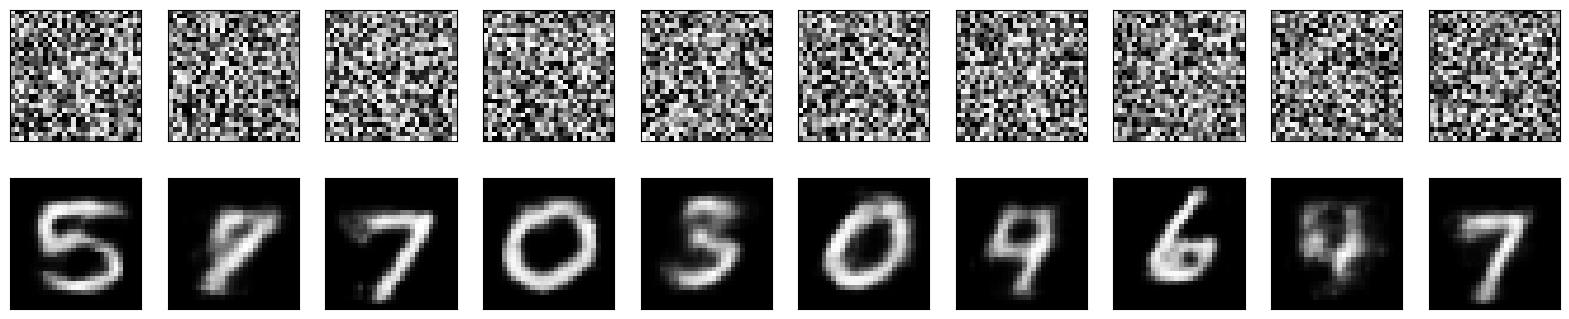

In [26]:
display(noisyimages, pred, noisylabels)

##### Labelwise Plots // Uncomment Single Line and Run Cell if Required

In [27]:
'''
DISPLAY RECOVERED IMAGES FOR EACH CLASS
'''
# display(np.array(noisyimages[noisylabels==0][5924:]), predTest0, np.array(noisylabels[noisylabels==0][5924:]))
# display(np.array(noisyimages[noisylabels==1][5000:]), predTest1, np.array(noisylabels[noisylabels==1][5000:]))
# display(np.array(noisyimages[noisylabels==2][5959:]), predTest2, np.array(noisylabels[noisylabels==2][5959:]))
# display(np.array(noisyimages[noisylabels==3][6132:]), predTest3, np.array(noisylabels[noisylabels==3][6132:]))
# display(np.array(noisyimages[noisylabels==4][5000:]), predTest4, np.array(noisylabels[noisylabels==4][5000:]))
# display(np.array(noisyimages[noisylabels==5][5000:]), predTest5, np.array(noisylabels[noisylabels==5][5000:]))
# display(np.array(noisyimages[noisylabels==6][5000:]), predTest6, np.array(noisylabels[noisylabels==6][5000:]))
# display(np.array(noisyimages[noisylabels==7][5000:]), predTest7, np.array(noisylabels[noisylabels==7][5000:]))
# display(np.array(noisyimages[noisylabels==8][5000:]), predTest8, np.array(noisylabels[noisylabels==8][5000:]))
# display(np.array(noisyimages[noisylabels==9][5950:]), predTest9, np.array(noisylabels[noisylabels==9][5950:]))

'\nDISPLAY RECOVERED IMAGES FOR EACH CLASS\n'

#### Take the Denoised Data and Prepare it for Classifier

##### Train - Validation Split

In [28]:
from sklearn.model_selection import train_test_split

X = pred
y = noisylabels

X_train_clf, X_val_clf, y_train_clf, y_val_clf = train_test_split(X, y, test_size=0.2, random_state=42)

##### Caategorical Label [With Help of One Hot Encoding]

In [29]:
y_train_clf = tf.one_hot(y_train_clf, depth = 10)
y_val_clf = tf.one_hot(y_val_clf, depth = 10)

# Experimental
'''
y_test_clf = tf.one_hot(y_test_clf, depth = 10)
'''

In [30]:
print(X_train_clf.shape, y_train_clf.shape)
print(X_val_clf.shape, y_val_clf.shape)

# Experimental
'''
print(X_test_clf.shape, y_test_clf.shape)
'''

(48000, 28, 28, 1) (48000, 10)
(12000, 28, 28, 1) (12000, 10)


#### Classifier

##### Library Imports

In [31]:
from keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping
from keras.callbacks import LearningRateScheduler
from keras.callbacks import ReduceLROnPlateau

##### Define Classifier

In [32]:
inputs = tf.keras.Input(shape=(28, 28, 1))
x = inputs

x = tf.keras.layers.Conv2D(filters=32, kernel_size=5, use_bias=False)(x)

for size in [32, 64, 128, 256, 512]:
    residual = x

    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Activation("relu")(x)
    x = tf.keras.layers.SeparableConv2D(size, 3, padding="same", use_bias=False)(x)

    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Activation("relu")(x)
    x = tf.keras.layers.SeparableConv2D(size, 3, padding="same", use_bias=False)(x)

    x = tf.keras.layers.MaxPooling2D(3, strides=2, padding="same")(x)

    residual = tf.keras.layers.Conv2D(
        size, 1, strides=2, padding="same", use_bias=False)(residual)
    x = tf.keras.layers.add([x, residual])

x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dropout(0.5)(x)
outputs = tf.keras.layers.Dense(10, activation="softmax")(x)
clf1 = tf.keras.Model(inputs=inputs, outputs=outputs)

##### Add Callbacks

In [33]:
callbacks_list = [
    EarlyStopping(
        monitor="val_accuracy",
        patience=5,
    ),
    ModelCheckpoint(
        filepath="/content/drive/MyDrive/DL-Proj-Final/Classifier/classifier_CNN_Xception_25_noisymnist.h5",
        monitor="val_accuracy",
        save_best_only=True,
    )
]

##### Train Classifier

In [34]:
clf1.compile(loss="categorical_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])
history_clf1 = clf1.fit(
    X_train_clf,
    y_train_clf,
    epochs=25,
    callbacks=callbacks_list,
    validation_data=(X_val_clf, y_val_clf)
)

Epoch 1/25
1500/1500 [==============================] - 28s 12ms/step - loss: 0.5773 - accuracy: 0.8165 - val_loss: 0.5185 - val_accuracy: 0.8349
Epoch 2/25


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1500/1500 [==============================] - 22s 15ms/step - loss: 0.5175 - accuracy: 0.8363 - val_loss: 0.5425 - val_accuracy: 0.8388
Epoch 3/25
1500/1500 [==============================] - 23s 15ms/step - loss: 0.5052 - accuracy: 0.8376 - val_loss: 0.5041 - val_accuracy: 0.8422
Epoch 4/25
1500/1500 [==============================] - 21s 14ms/step - loss: 0.4942 - accuracy: 0.8398 - val_loss: 0.4811 - val_accuracy: 0.8443
Epoch 5/25
1500/1500 [==============================] - 23s 15ms/step - loss: 0.4824 - accuracy: 0.8438 - val_loss: 0.6087 - val_accuracy: 0.8091
Epoch 6/25
1500/1500 [==============================] - 26s 17ms/step - loss: 0.4760 - accuracy: 0.8460 - val_loss: 0.4776 - val_accuracy: 0.8457
Epoch 7/25
1500/1500 [==============================] - 23s 16ms/step - loss: 0.4725 - accuracy: 0.8475 - val_loss: 0.5120 - val_accuracy: 0.8450
Epoch 8/25
1500/1500 [==============================] - 22s 15ms/step - loss: 0.4641 - accuracy: 0.8480 - val_loss: 0.5066 - val_accura

In [35]:
clf1.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 28, 28, 1)]          0         []                            
                                                                                                  
 conv2d_11 (Conv2D)          (None, 24, 24, 32)           800       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 24, 24, 32)           128       ['conv2d_11[0][0]']           
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 24, 24, 32)           0         ['batch_normalization[0][0

##### Save Classifier

In [36]:
clf1.save('/content/drive/MyDrive/DL-Proj-Final/classifier_CNN_Xception_25_mnist.h5')

##### Plot Metrics

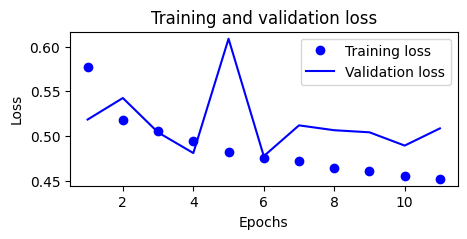

In [37]:
history_clf_dict = history_clf1.history
loss_values = history_clf_dict["loss"]
val_loss_values = history_clf_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.figure(figsize=(5,2))
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

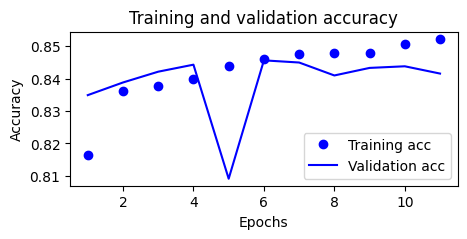

In [38]:
acc = history_clf_dict["accuracy"]
val_acc = history_clf_dict["val_accuracy"]
plt.figure(figsize=(5,2))
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

#### **[ TEST PHASE ]**

In [64]:
from tensorflow.keras import models
import pickle
import tensorflow as tf

model_eval = models.load_model("./classifier_CNN_Xception_25_noisymnist.h5")
test_labels = pickle.load(open("./636_project1_test_labels", 'rb'))
test_images = pickle.load(open("./636_project1_test_images", 'rb'))

##### Pre-processing | Data Processing

In [ ]:
# The Denoiser Network was trained by me | Did not use anyone else's model available on the internet
# Refer to the Previous Sections of this Notebook for Detailed Overview of the Denoiser

'''
wget-ing the denoiser from my repository for this deep learning project to utilize as a filter on noisy image
'''

# --------------------------------------------------------------------------------------------------------------------------

'''Weights and Serialized Network'''
# Check https://github.com/Soumyajyotidutta/DeepLearning/tree/main/Projects/Project1/weights-and-serialization-autoencoder

'''The .keras File'''
# Check https://github.com/Soumyajyotidutta/DeepLearning/tree/main/Projects/Project1/AutoEncoder

In [67]:
!wget https://raw.githubusercontent.com/Soumyajyotidutta/DeepLearning/main/Projects/Project1/AutoEncoder/autoencoder_edition2_256_150_notShuffled.keras

--2023-10-11 01:38:48--  https://raw.githubusercontent.com/Soumyajyotidutta/DeepLearning/main/Projects/Project1/AutoEncoder/autoencoder_edition2_256_150_notShuffled.keras
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9567286 (9.1M) [application/octet-stream]
Saving to: ‘autoencoder_edition2_256_150_notShuffled.keras’

autoencoder_edition 100%[===================>]   9.12M  --.-KB/s    in 0.05s   

2023-10-11 01:38:48 (189 MB/s) - ‘autoencoder_edition2_256_150_notShuffled.keras’ saved [9567286/9567286]



##### Function to Pre-process the Images

In [68]:
def preprocess(test_images, test_labels):

  filter = tf.keras.saving.load_model('./autoencoder_edition2_256_150_notShuffled.keras')

  test_images = np.array(test_images)
  test_images = test_images.astype('float32') / 255
  test_images = test_images.reshape(len(test_images), 28, 28, 1)

  test_images_denoised = filter.predict(test_images)

  test_labels = np.array(test_labels)
  test_labels = tf.one_hot(test_labels, depth=10)

  return test_images_denoised, test_labels, filter.summary()

In [ ]:
test_images_mod, test_labels_mod, _ = preprocess(test_images, test_labels)

##### Evaluate the Model

In [70]:
test_loss, test_acc = model_eval.evaluate(test_images_mod, test_labels_mod)
your_score = round(test_acc*1000) / 10
print(f"Your Score: {your_score}")

1875/1875 [==============================] - 7s 4ms/step - loss: 0.4469 - accuracy: 0.8526
Your Score: 85.3
